In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [311]:
data = pd.read_csv('heart_disease.csv', index_col=False)

In [312]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [313]:
data.duplicated().sum()

np.int64(723)

In [314]:
data = data.drop_duplicates()

In [315]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


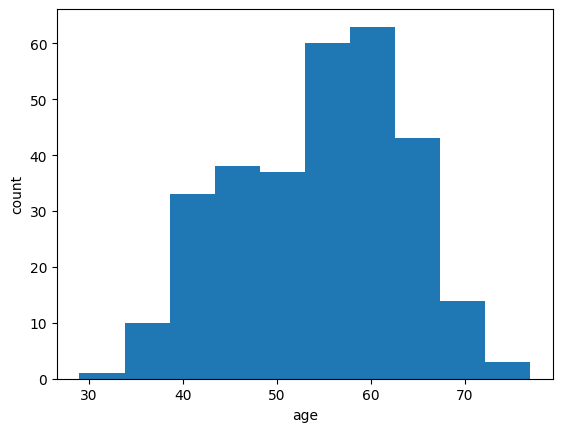

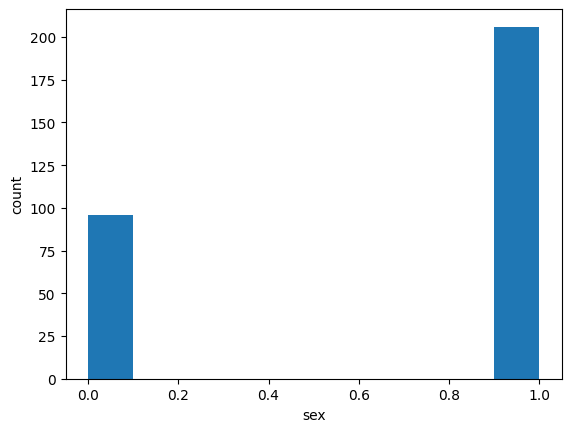

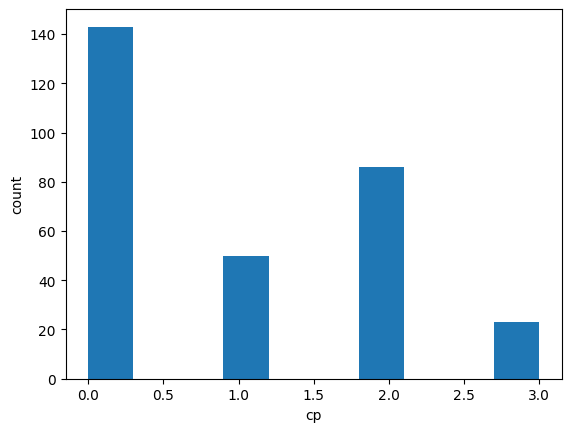

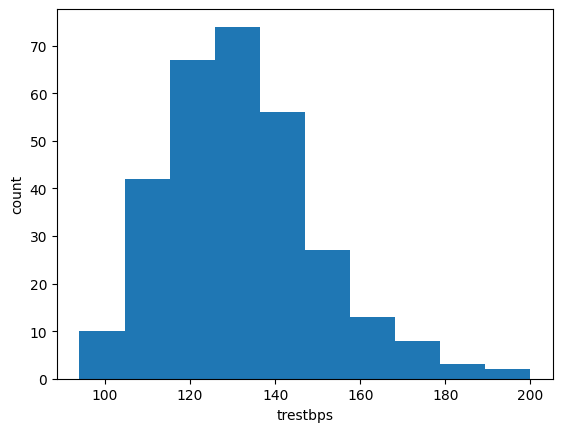

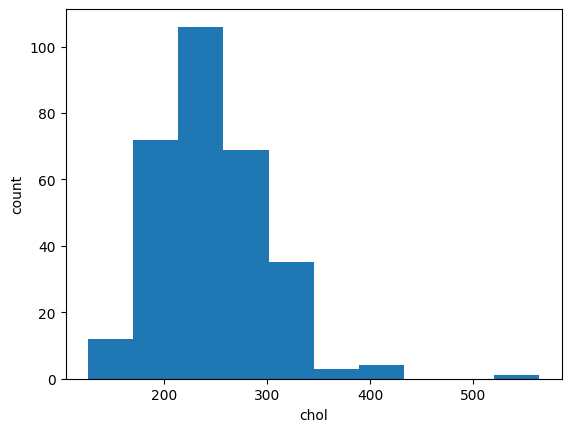

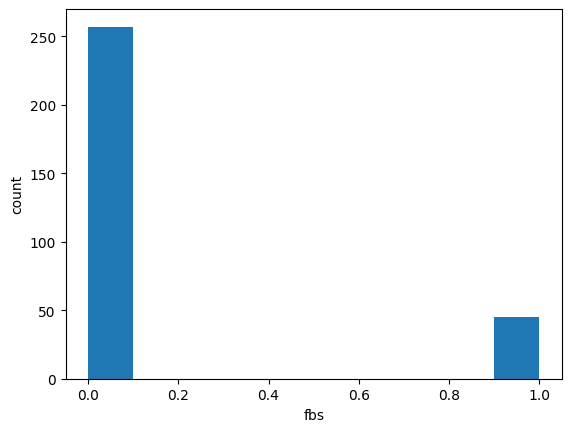

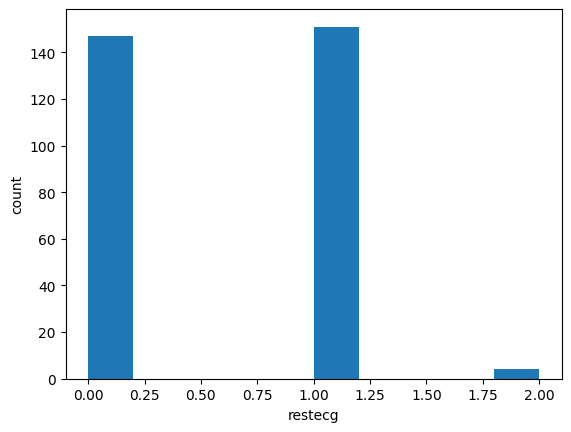

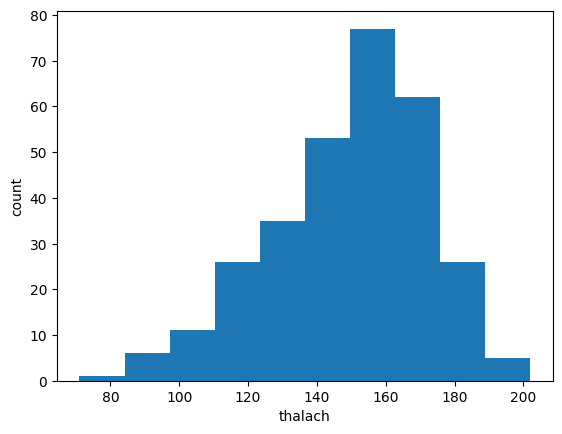

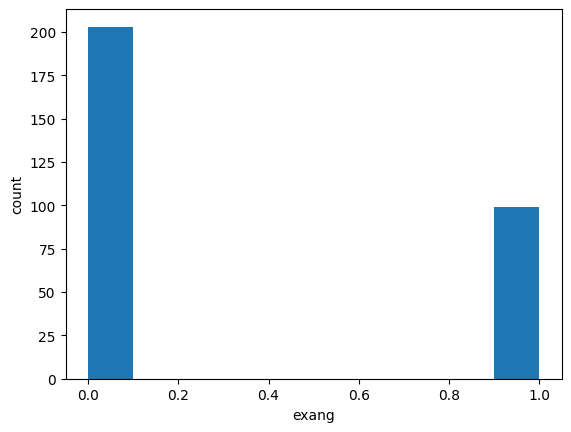

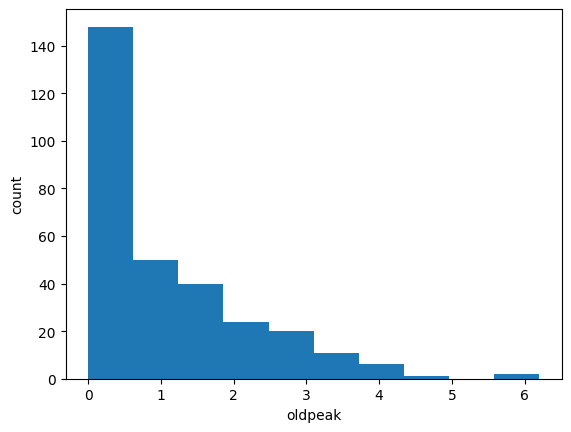

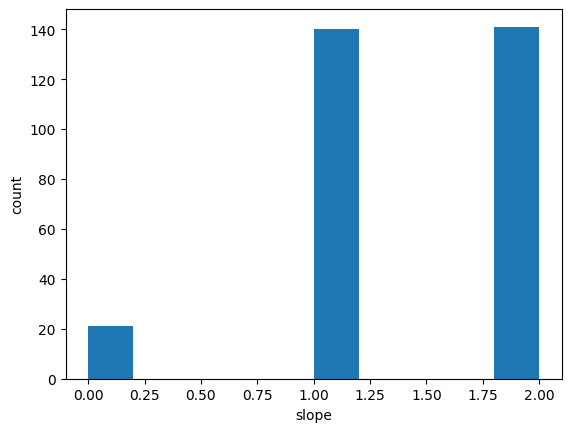

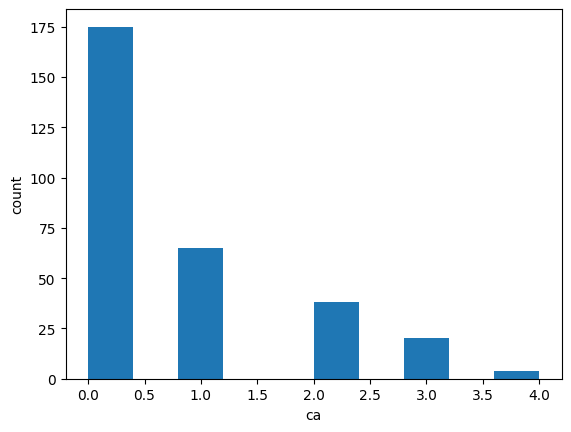

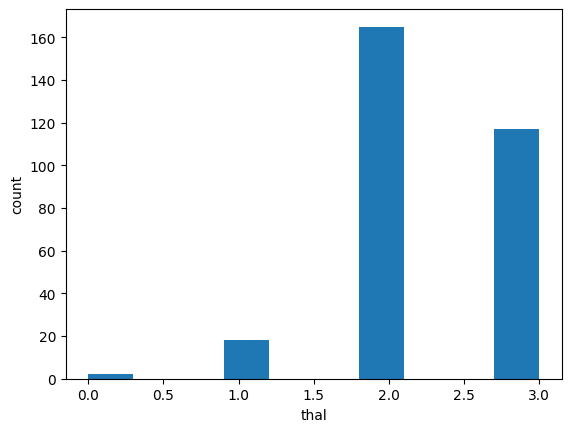

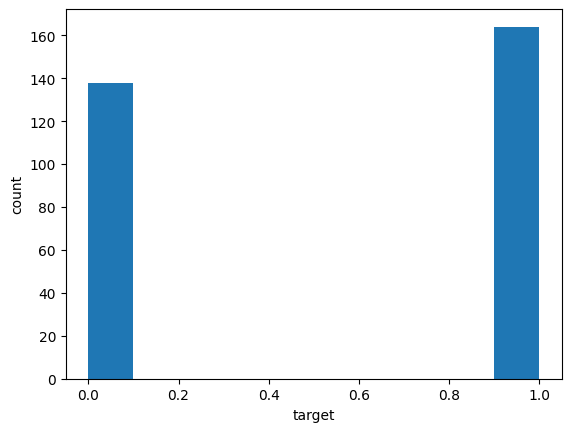

In [316]:
num_cols = data.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(data[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

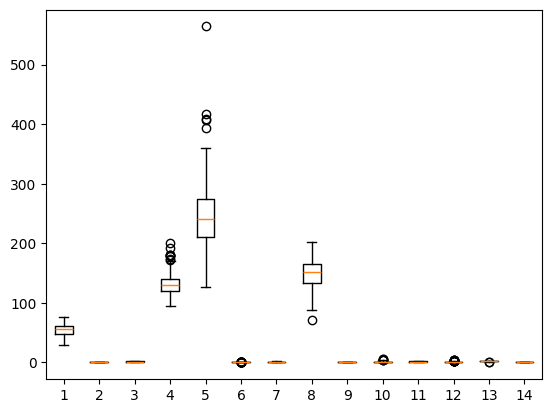

In [317]:
plt.boxplot(data)
plt.show()

In [318]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [319]:
numerical_cols_for_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols_for_outliers:
  data[col] = replace_outliers_with_upper_bound(data, col)

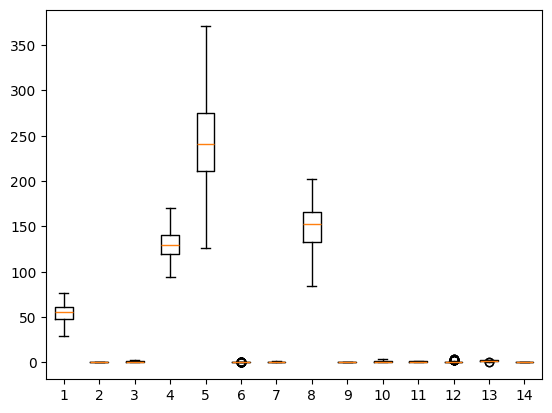

In [320]:
plt.boxplot(data)
plt.show()

In [321]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [322]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,-0.377511,-0.704039,0.808993,-0.025091,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,0.527318,-0.893880,0.237018,1.869266,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,0.828927,-1.505591,-1.082925,1.418229,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1.009893,-0.893880,0.501006,-0.927166,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0.406674,1.025627,-1.918889,0.786777,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.679121,-0.725132,-1.522906,0.425947,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,-1.402984,-2.201676,1.116980,-0.385921,1,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,-0.196546,0.202981,0.501006,-0.927166,0,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1.733756,0.582664,-1.082925,-0.927166,0,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [323]:
X_reg = data.drop('chol', axis=1)
y_reg = data['chol']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [324]:
reg_table = PrettyTable()
reg_table.title = "Regression Task Summary (Target: chol)"
reg_table.field_names = ["Model", "MAE", "MSE", "R-squared (R²)"]

In [325]:
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)
y_pred_lr = lr.predict(X_reg_test)

In [326]:
mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
mse_lr = mean_squared_error(y_reg_test, y_pred_lr)
r2_lr = r2_score(y_reg_test, y_pred_lr)

reg_table.add_row([
    "Linear Regression",
    f"{mean_absolute_error(y_reg_test, y_pred_lr):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_lr):.2f}",
    f"{r2_score(y_reg_test, y_pred_lr):.2f}"
])

In [327]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(X_reg_train, y_reg_train)
y_pred_svm = svm_model.predict(X_reg_test)
mae_svm = mean_absolute_error(y_reg_test, y_pred_svm)
mse_svm = mean_squared_error(y_reg_test, y_pred_svm)
r2_svm = r2_score(y_reg_test, y_pred_svm)

In [328]:
reg_table.add_row([
    "Support Vector Regressor (SVR)",
    f"{mean_absolute_error(y_reg_test, y_pred_svm):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_svm):.2f}",
    f"{r2_score(y_reg_test, y_pred_svm):.2f}"
])

In [329]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_reg_train, y_reg_train)
y_pred_rf = rf_model.predict(X_reg_test)

mae_rf = mean_absolute_error(y_reg_test, y_pred_rf)
mse_rf = mean_squared_error(y_reg_test, y_pred_rf)
r2_rf = r2_score(y_reg_test, y_pred_rf)

In [330]:
reg_table.add_row([
    "Random Forest Regressor",
    f"{mean_absolute_error(y_reg_test, y_pred_rf):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_rf):.2f}",
    f"{r2_score(y_reg_test, y_pred_rf):.2f}"
])

In [331]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [332]:
cls_table = PrettyTable()
cls_table.title = "Classification Task Summary (Target: target)"
cls_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lor = log_reg.predict(X_test)

In [334]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [335]:
cls_table.add_row([
    "Logistic Regression",
    f"{accuracy_score(y_test, y_pred_lor):.2f}",
    f"{precision_score(y_test, y_pred_lor):.2f}",
    f"{recall_score(y_test, y_pred_lor):.2f}",
    f"{f1_score(y_test, y_pred_lor):.2f}"
])

In [336]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [337]:
cls_table.add_row([
    "K-Nearest Neighbors (KNN)",
    f"{accuracy_score(y_test, y_pred_knn):.2f}",
    f"{precision_score(y_test, y_pred_knn):.2f}",
    f"{recall_score(y_test, y_pred_knn):.2f}",
    f"{f1_score(y_test, y_pred_knn):.2f}"
])

In [338]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [339]:
cls_table.add_row([
    "Random Forest Classifier",
    f"{accuracy_score(y_test, y_pred_rf):.2f}",
    f"{precision_score(y_test, y_pred_rf):.2f}",
    f"{recall_score(y_test, y_pred_rf):.2f}",
    f"{f1_score(y_test, y_pred_rf):.2f}"
])

In [340]:
print(reg_table)
print("\nBest Performing Regression Model: Support Vector Regressor (SVR)")

+---------------------------------------------------------------+
|             Regression Task Summary (Target: chol)            |
+--------------------------------+------+------+----------------+
|             Model              | MAE  | MSE  | R-squared (R²) |
+--------------------------------+------+------+----------------+
|       Linear Regression        | 0.73 | 0.87 |     -0.23      |
| Support Vector Regressor (SVR) | 0.68 | 0.76 |     -0.07      |
|    Random Forest Regressor     | 0.71 | 0.82 |     -0.15      |
+--------------------------------+------+------+----------------+

Best Performing Regression Model: Support Vector Regressor (SVR)


In [341]:
print(cls_table)
print("\nBest Performing Classification Model: Random Forest Classifier")

+----------------------------------------------------------------------+
|             Classification Task Summary (Target: target)             |
+---------------------------+----------+-----------+--------+----------+
|           Model           | Accuracy | Precision | Recall | F1-Score |
+---------------------------+----------+-----------+--------+----------+
|    Logistic Regression    |   0.77   |    0.73   |  0.83  |   0.77   |
| K-Nearest Neighbors (KNN) |   0.74   |    0.68   |  0.86  |   0.76   |
|  Random Forest Classifier |   0.74   |    0.69   |  0.83  |   0.75   |
+---------------------------+----------+-----------+--------+----------+

Best Performing Classification Model: Random Forest Classifier


In [342]:
class CustomLinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [343]:
X = data.drop('chol', axis=1).astype(float)
y = data['chol']
X_np = X.to_numpy()
y_np = y.to_numpy()
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

custom_regressor = CustomLinearRegression(lr=0.01, n_iters=1500)
custom_regressor.fit(X_reg_train, y_reg_train)
predictions = custom_regressor.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, predictions)
r2 = r2_score(y_reg_test, predictions)
print(f"Custom Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Custom Model R-squared (R²): {r2:.2f}\n")

Custom Model Mean Squared Error (MSE): 0.80
Custom Model R-squared (R²): -0.13

